# ***Train Model By SVC & Naive Baye Model***


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/sample_data/heart.csv")

***Preprocessing*** ***Data***

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.shape

(1025, 14)

In [7]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         8
61   1    0   148       203   0    1        161      0      0.0      2      1   3     0         4
              138       166   0    0        125      1      3.6      1      1   2     0         4
52   1    0   112       230   0    1        160      0      0.0      2      1   2     0         4
              125       212   0    1        168      0      1.0      2      2   3     0         4
                                                                                               ..
53   0    0   130       264   0    0        143      0      0.4      1      0   2     1         3
              138       234   0    0        160      0      0.0      2      0   2     1         3
          2   128       216   0    0        115      0      0.0      2      0   0     1         3
     1    0   142       2

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

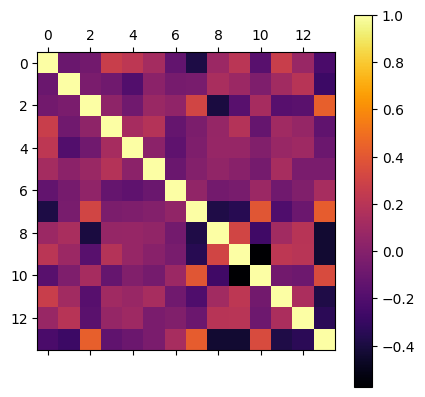

In [10]:
plt.matshow(df.corr(),cmap='inferno')
plt.colorbar()
plt.show()

**Split Data**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=df.drop(columns='target')

In [13]:
y=df['target']

In [14]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [15]:
y


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=41,random_state=0)

***Train Model by Naive Baye & SVC***

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [18]:
y_pred =model.predict(x_test)

In [19]:
from sklearn import metrics

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.8536585365853658

In [24]:
from sklearn.svm import SVC

In [25]:
sv=SVC()

In [26]:
sv.fit(x_train,y_train)

SVC()

In [27]:
pred_sv=sv.predict(x_test)

In [28]:
metrics.accuracy_score(y_test,pred_sv)

0.7560975609756098

In [21]:
from sklearn.metrics import classification_report

In [29]:
class_report_nb=classification_report(y_test,y_pred)

In [30]:
class_report_svc=classification_report(y_test,pred_sv)

***Accuracy of*** ***Models***

In [31]:
print(class_report_nb)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.79      0.95      0.86        20

    accuracy                           0.85        41
   macro avg       0.87      0.86      0.85        41
weighted avg       0.87      0.85      0.85        41



In [32]:
print(class_report_svc)

              precision    recall  f1-score   support

           0       0.92      0.57      0.71        21
           1       0.68      0.95      0.79        20

    accuracy                           0.76        41
   macro avg       0.80      0.76      0.75        41
weighted avg       0.80      0.76      0.75        41

